In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from ipywidgets import FileUpload
from IPython.display import display
from io import BytesIO

In [ ]:
# Show file upload button
uploader = FileUpload(accept='.csv', multiple=False)
display(uploader)

# Helper to prepare data
def prepare_data(df):
    df = df.copy()
    if 'en_per_gdp' in df.columns and 'gdp' in df.columns:
        df['en_ttl'] = df['en_per_gdp'] * df['gdp'] / 1000
    df.dropna(inplace=True)
    return df

# Helper to compute VIF
def compute_vif(df, features):
    return pd.DataFrame(
        {'feature': features,
         'VIF': [variance_inflation_factor(df[features].values, i) for i in range(len(features))]}
    )

FileUpload(value={}, accept='.csv', description='Upload')

✅ Data loaded and prepared successfully!
        feature        VIF
0  cereal_yield   3.574053
1  fdi_perc_gdp   1.429465
2   gni_per_cap   3.776845
3    en_per_cap  24.664659
4   co2_per_cap  19.388017
5        en_ttl   1.085505
Cleaned data shape: (1700, 19)


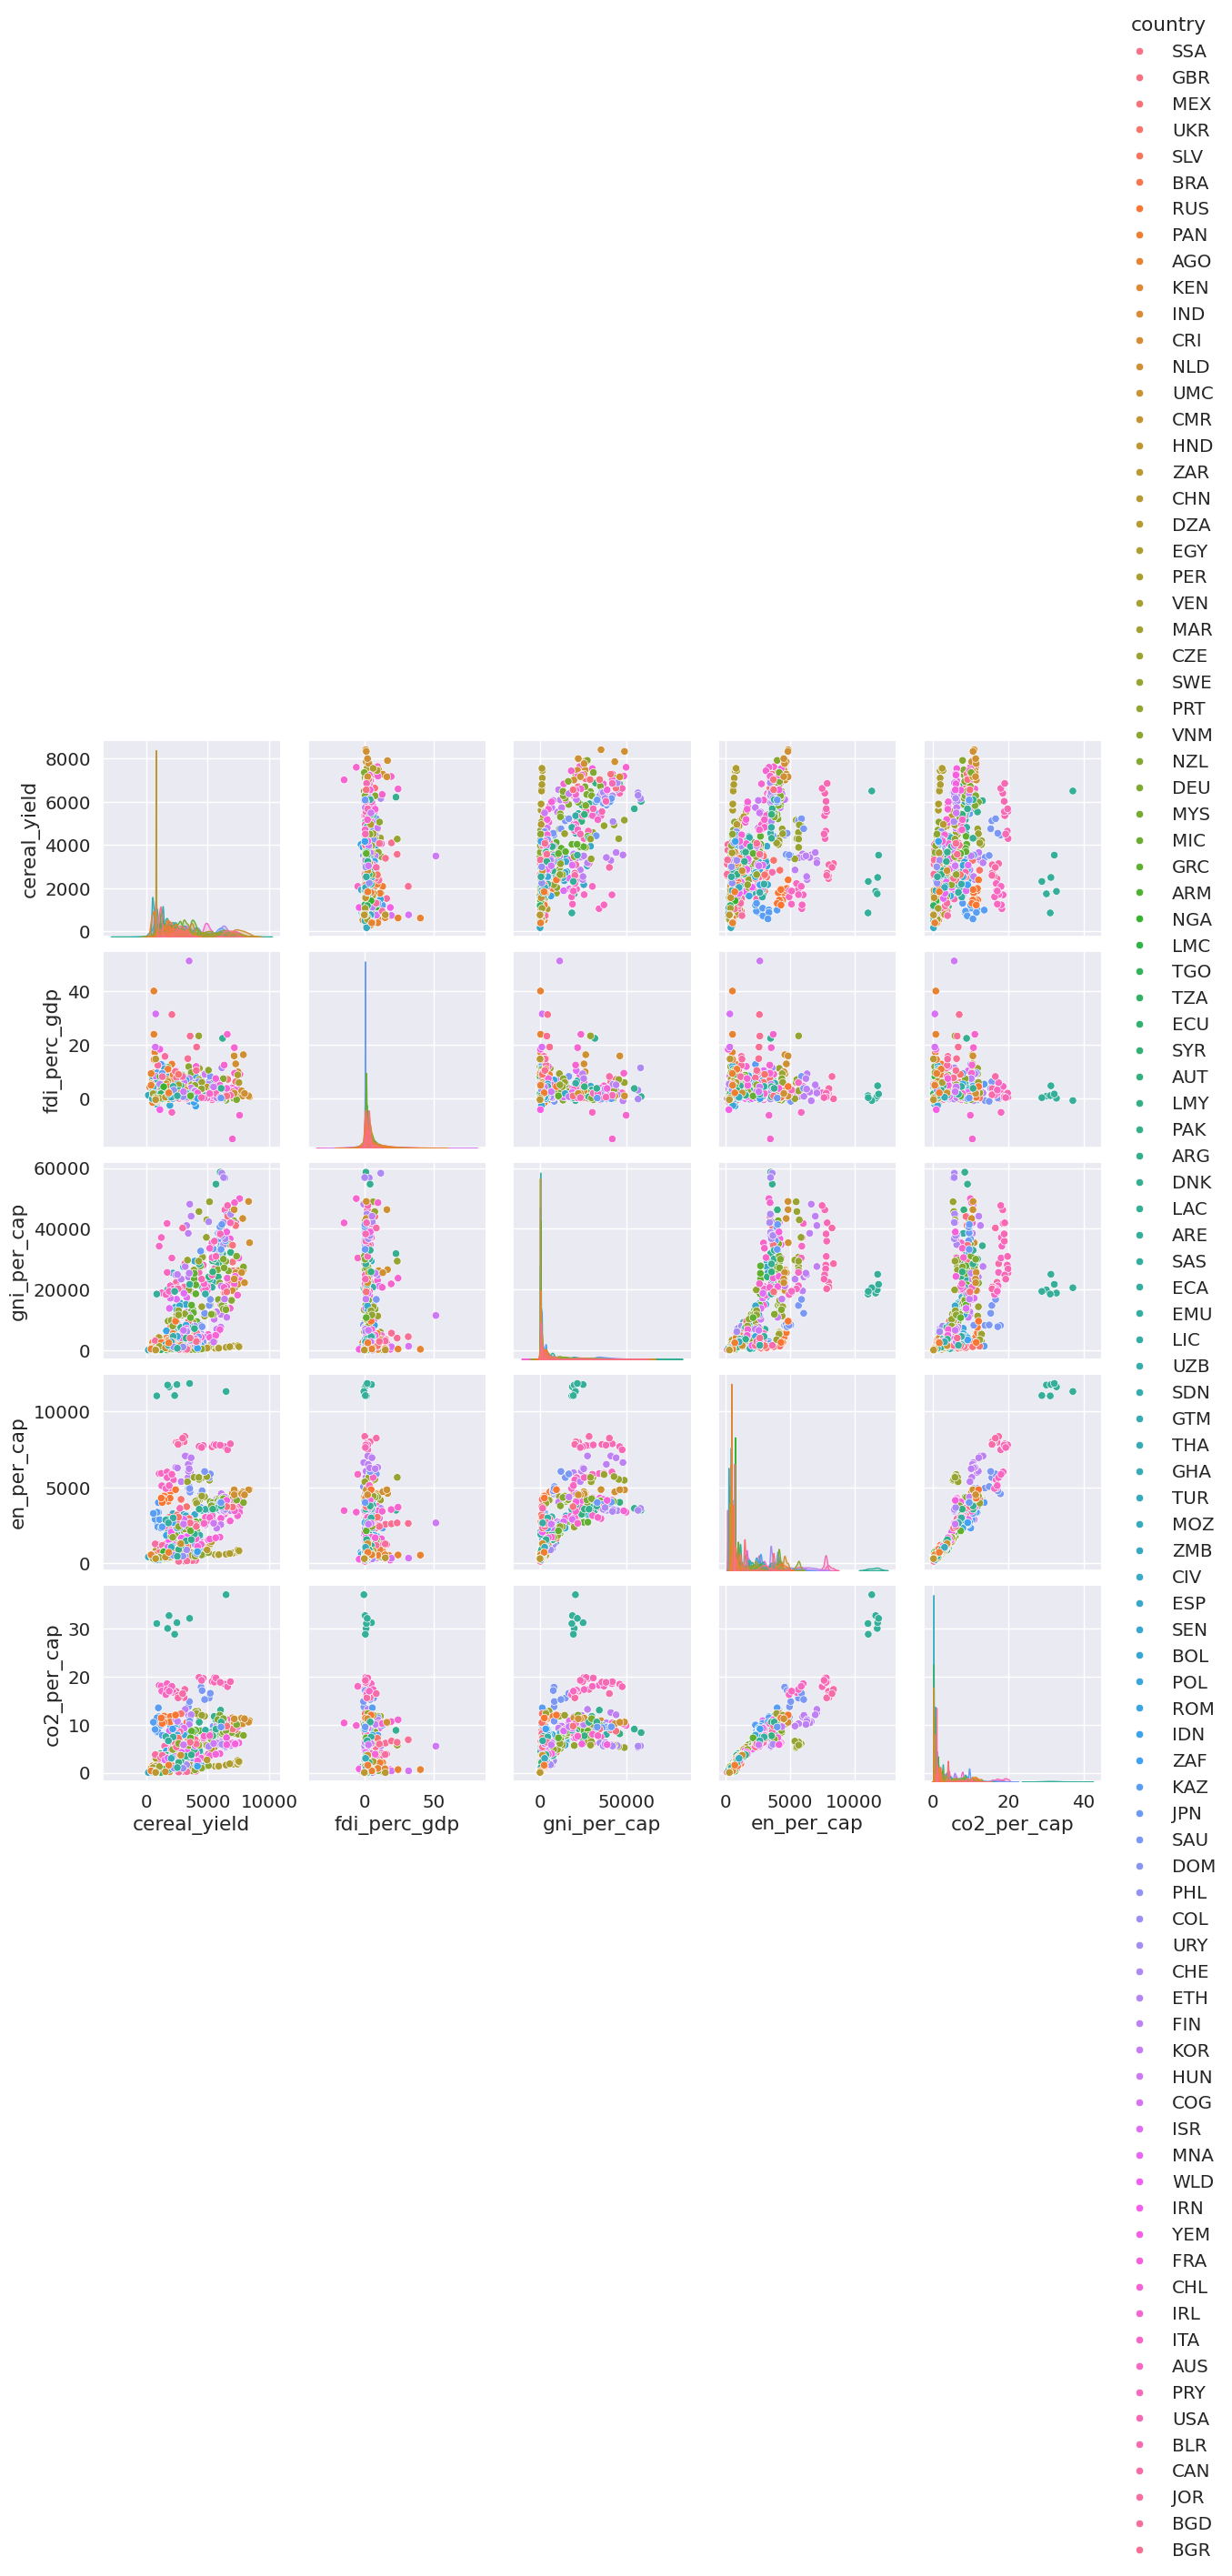

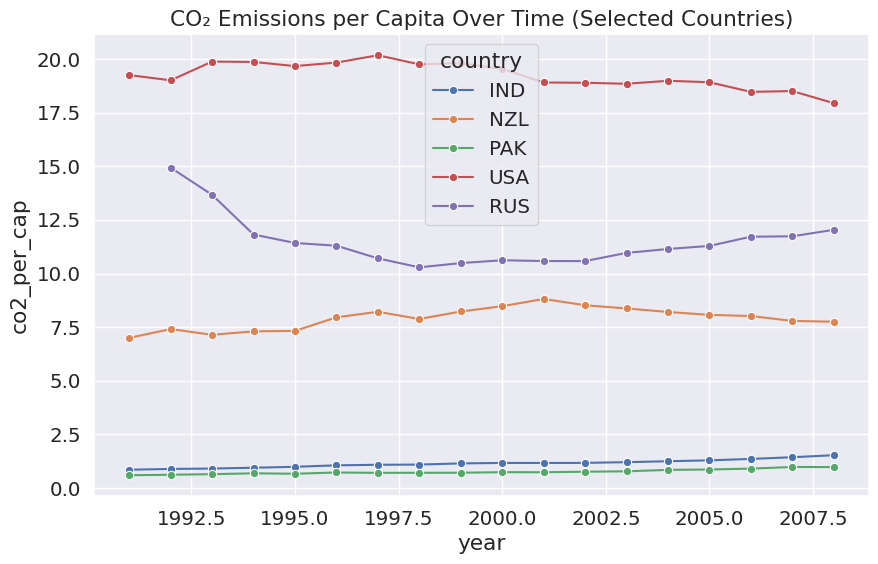

In [ ]:

# Run this part after uploading the file
if uploader.value:
    uploaded_file = list(uploader.value.values())[0]
    content = uploaded_file['content']
    data = pd.read_csv(BytesIO(content))
    data = prepare_data(data)
    print("✅ Data loaded and prepared successfully!")

    # Convert columns to numeric
    cols_to_plot = ['cereal_yield', 'fdi_perc_gdp', 'gni_per_cap', 'en_per_cap', 'co2_per_cap']
    for col in cols_to_plot:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    data.dropna(subset=cols_to_plot, inplace=True)

    # Plot data
    sampled_data = data.sample(n=min(1000, len(data)), random_state=42)
    sns.set_theme(font_scale=1.3)
    sns.pairplot(data=sampled_data, hue='country', vars=cols_to_plot)
    plt.savefig('pairplot_sampled.png')

    selected_countries = ['IND', 'USA', 'PAK', 'RUS', 'NZL']
    filtered_data = data[data['country'].isin(selected_countries)]
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=filtered_data, x='year', y='co2_per_cap', hue='country', marker='o')
    plt.title('CO₂ Emissions per Capita Over Time (Selected Countries)')
    plt.savefig('co2_timeseries.png')

    # Compute VIF
    features_for_vif = ['cereal_yield', 'fdi_perc_gdp', 'gni_per_cap', 'en_per_cap', 'co2_per_cap', 'en_ttl']
    vif_df = compute_vif(data, features_for_vif)
    print(vif_df)

    # Save cleaned data
    data.to_csv('cleaned_data.csv', index=False)
    print('Cleaned data shape:', data.shape)
else:
    print('ℹ️ Please upload a file above and re-run this cell after upload.')